# Part 1. Introduction of Linear Regression

In [1]:
import pandas as pd
import numpy as np


In [2]:
import sklearn
from sklearn.datasets import make_regression

X,y = make_regression (n_samples=100, n_features=1, noise=5)

print ("x :", X[:10])
print ("y :", y[:10])

x : [[ 1.08876721]
 [-0.01162588]
 [-0.12933803]
 [-0.74230222]
 [ 0.96593078]
 [ 1.31240717]
 [-0.31207174]
 [-0.05565518]
 [-0.46189703]
 [-0.49579   ]]
y : [ 15.86587765   1.54920537   0.14752826 -14.08122853  12.72450696
  24.09342031 -16.45320509  -1.40883535 -15.83353382 -18.02332944]


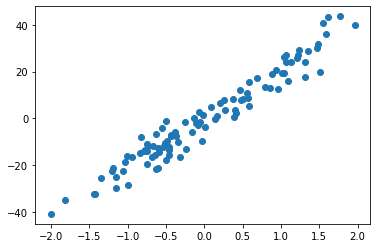

In [3]:
from matplotlib import pyplot

pyplot.scatter(X,y)
pyplot.show()

## Do Regression

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)


LinearRegression()

In [5]:
print ("coefficients :", lr.coef_)
print ('intercept: ', lr.intercept_)

coefficients : [20.64753224]
intercept:  -0.4166355332812278


## Predictions

In [6]:
predictions = lr.predict(X)
print ('predictions : ', predictions[:10])

predictions :  [ 22.06372046  -0.6566812   -3.08714666 -15.7433446   19.52745139
  26.6813339   -6.86014693  -1.56577772  -9.95366936 -10.65347553]


## Plot

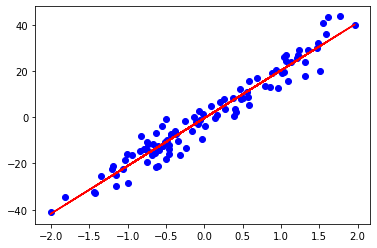

In [7]:
from matplotlib import pyplot

pyplot.scatter(X,y, color='blue')
pyplot.plot(X, predictions, color='red')
pyplot.show()

## Calculate the errors
We can calculate MSE, MAE and RMSE
Here is an [example](https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606)

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predictions)

print ('MSE :', mse)
print ('RMSE :', rmse)
print ('MAE :', mae)

MSE : 20.5440517259564
RMSE : 4.532554657801316
MAE : 3.637851931100109


# Part 2. Introduction of Linear Regression - tips Exercise 

# Linear Regression in using Scikit-Learn

# Step 1 - Load Data

In [9]:
import pandas as pd

tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
                        'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]})
tip_data

,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


# Step 2 - Exploratory Data Analytics (EDA)

Do some basic plots ..etc

In [10]:
## describe
tip_data.describe()

,bill,tip
count,10.000000,10.000000
mean,35.000000,7.100000
std,18.708287,4.771443
min,10.000000,2.000000
25%,21.250000,3.250000
50%,32.500000,6.000000
75%,47.500000,11.000000
max,65.000000,15.000000


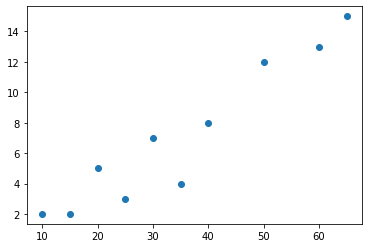

In [11]:
## plot 
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(tip_data['bill'], tip_data['tip'])

# Step 3 - Shape Data

In [12]:
## don't forget the double brackets!
## x is a dataframe
## TODO  : x is 'bill'
x = tip_data[['bill']]
print(x)

## don't forget the double brackets!
## y is a dataframe
## TODO : y is tip
y = tip_data[['tip']]
print (y)

   bill
0  50.0
1  30.0
2  60.0
3  40.0
4  65.0
5  20.0
6  10.0
7  15.0
8  25.0
9  35.0
    tip
0  12.0
1   7.0
2  13.0
3   8.0
4  15.0
5   5.0
6   2.0
7   2.0
8   3.0
9   4.0


# Step 4 : Do Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

## TODO : fit with (x,y)
model = LinearRegression ().fit(x,y)
model

LinearRegression()

# Step 5 : Predict

In [14]:
## TODO : predict on x
predictions = model.predict(x)
predictions

array([[10.74285714],
       [ 5.88571429],
       [13.17142857],
       [ 8.31428571],
       [14.38571429],
       [ 3.45714286],
       [ 1.02857143],
       [ 2.24285714],
       [ 4.67142857],
       [ 7.1       ]])

In [15]:
## Compare actual vs. predictions

tip_data['predictions'] = predictions
tip_data

,bill,tip,predictions
0,50.0,12.0,10.742857
1,30.0,7.0,5.885714
2,60.0,13.0,13.171429
3,40.0,8.0,8.314286
4,65.0,15.0,14.385714
5,20.0,5.0,3.457143
6,10.0,2.0,1.028571
7,15.0,2.0,2.242857
8,25.0,3.0,4.671429
9,35.0,4.0,7.100000


# Step 6 : Evaluate

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
print ("slope : ", slope, ", intercept: ", intercept)

print ("R2 : " , r2_score(y, predictions))

print ("MSE : ", mean_squared_error(y, predictions))

Coefficients: [[0.24285714]]
intercept: [-1.4]
slope :  0.2428571428571429 , intercept:  -1.4000000000000021
R2 :  0.9067140765530224
MSE :  1.9114285714285715


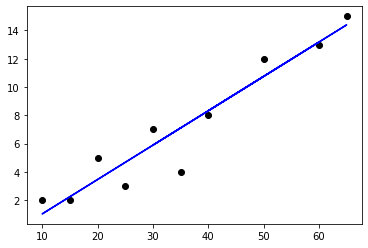

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y , color="black")
plt.plot(x, predictions, color='blue')

# Step 7 : Predict on some new data

In [18]:
## TODO : create a new dataframe with amounts : 100, 200, 300
new_data = pd.DataFrame({'bill' : [100,200,300]})
new_data

,bill
0,100
1,200
2,300


In [19]:
new_tips = model.predict (new_data)
new_tips

array([[22.88571429],
       [47.17142857],
       [71.45714286]])

In [20]:
new_data['predicted_tip'] = new_tips
new_data

,bill,predicted_tip
0,100,22.885714
1,200,47.171429
2,300,71.457143


# Part 3 - House sales data

1. Data: house-sales-full.csv

In [33]:
house_price = pd.read_csv("house-sales-full.csv")
house_price

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,1,9/16/14,280000,1000102,Multiplex,9/1/14,405100,0.930836,300805.0,2,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2,6/16/06,1000000,1200013,Single Family,6/1/06,404400,0.929228,1076162.0,1,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,3,1/29/07,745000,1200019,Single Family,1/1/07,425600,0.977941,761805.0,1,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,4,2/25/08,425000,2800016,Single Family,2/1/08,418400,0.961397,442065.0,1,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,5,3/29/13,240000,2800024,Single Family,3/1/13,351600,0.807904,297065.0,1,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,10/1/12,332400,0.763787,489665.0,1,...,1.75,2,9,2011,0,0,147000,269000,-1,False
27059,27060,12/7/12,374000,9895000040,Townhouse,12/1/12,339400,0.779871,479566.0,1,...,1.75,2,9,2011,0,0,147000,269000,-1,True
27060,27061,7/9/12,165000,9899200010,Single Family,7/1/12,325300,0.747472,220744.0,1,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27061,27062,5/26/06,315000,9900000355,Single Family,5/1/06,400600,0.920496,342207.0,1,...,2.00,3,7,1939,0,0,103000,212000,98166,False


2. Label is : SalePrice

In [50]:
Y = np.asarray(house_price['SalePrice'])
print(y)

[ 280000 1000000  745000 ...  165000  315000  465000]


3. Input features : Start with Bedrooms, Bathrooms, SqFtTotLiving, SqFtLot

In [51]:
X = np.asarray(house_price[['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot']])
print(X)

[[6.0000e+00 3.0000e+00 2.4000e+03 9.3730e+03]
 [4.0000e+00 3.7500e+00 3.7640e+03 2.0156e+04]
 [4.0000e+00 1.7500e+00 2.0600e+03 2.6036e+04]
 ...
 [4.0000e+00 1.0000e+00 1.0700e+03 1.1170e+04]
 [3.0000e+00 2.0000e+00 1.3450e+03 6.2230e+03]
 [3.0000e+00 1.5000e+00 7.9000e+02 4.4000e+03]]


4. Run linear regression

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(house_price[['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot']])
Y = np.asarray(house_price['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.4965935230476567
Weights:  [-5.98622047e+04  1.95556196e+04  2.74492783e+02 -7.01171775e-02]


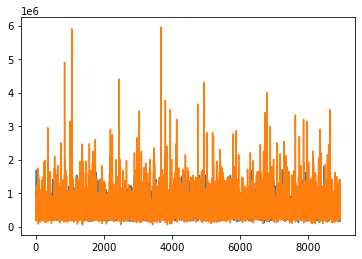

In [59]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

5. What is the R2 you are getting?

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)

slope = model.coef_
intercept = model.intercept_
print ("slope : ", slope, ", intercept: ", intercept)

print ("R2 : " , r2_score(Y, predictions))   #R square is 0.483

print ("MSE : ", mean_squared_error(Y, predictions))

Coefficients: [-6.52117361e+04  1.62741914e+04  2.77848047e+02 -7.45705406e-02]
intercept: 106303.30611502391
slope :  [-6.52117361e+04  1.62741914e+04  2.77848047e+02 -7.45705406e-02] , intercept:  106303.30611502391
R2 :  0.483482252362197
MSE :  60702204448.745056


6. Can you reason why the R2 is low?

In [64]:
# Lower R squared means that some of the features are less important or are not associated with each other.

7. Add more features to input and see if you can improve the score

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(house_price[['Bedrooms', 'Bathrooms','SqFtTotLiving', 'SqFtLot','LandVal','ImpsVal']])
Y = np.asarray(house_price['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.828665159618623
Weights:  [-9.32546862e+03  7.00579016e+03  4.40208830e+01  3.39747245e-01
  9.37265801e-01  6.40821269e-01]


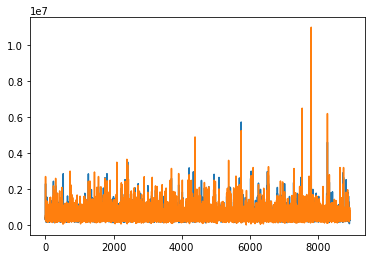

In [71]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)

slope = model.coef_
intercept = model.intercept_
print ("slope : ", slope, ", intercept: ", intercept)

print ("R2 : " , r2_score(Y, predictions))   #R square is 0.483

print ("MSE : ", mean_squared_error(Y, predictions))

Coefficients: [-6.52117361e+04  1.62741914e+04  2.77848047e+02 -7.45705406e-02]
intercept: 106303.30611502391
slope :  [-6.52117361e+04  1.62741914e+04  2.77848047e+02 -7.45705406e-02] , intercept:  106303.30611502391
R2 :  0.483482252362197
MSE :  60702204448.745056


8. What is the maximum R2 you can attain? With what features?

In [73]:
#By Adding Features of 'LandVal' and 'ImpsVal' will increase the scores from 0.49 to 0.83, but adding 'SqFtFinBasement' does not help the model very well, and the score is dropping from 0.49 to 0.48.
#However the R2 still remains the same as 0.483 by adding either 'LandVal', 'ImpsVal' or 'SqFtFinBasement'.